In [1]:
pip install inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
# measurement of the change in variance in the returns of stock over specific period of time
# Higher the volatility Higher the risk
import inline as inline
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# reading CSV file
s1=pd.read_csv("dataset/HistoricalData_AMZN.csv")
# seting date as a index
s1_2=pd.read_csv("dataset/HistoricalData_AMZN.csv",header=0, index_col="Date",parse_dates=True)

In [4]:
# Moving windows
# to analyse long term trends
# with respect to Daily percentages
daily_close_s1=s1_2[["Close/Last"]]
# daily returns
# pct means percentage
daily_pct_change_s1=daily_close_s1.pct_change()
# replacing NA values with 0
daily_pct_change_s1.fillna(0,inplace=True)
print(daily_pct_change_s1.head())

min_periods=75


            Close/Last
Date                  
2021-06-09    0.000000
2021-06-08   -0.005193
2021-06-07   -0.020251
2021-06-04    0.002567
2021-06-03   -0.005991


            Close/Last
Date                  
2011-06-16    0.231303
2011-06-15    0.230723
2011-06-14    0.229860
2011-06-13    0.227838
2011-06-10    0.226820
            Close/Last   Volume     Open     High      Low  42  252
Date                                                               
2021-06-09     3281.15  2455530  3272.87  3297.58  3270.70 NaN  NaN
2021-06-08     3264.11  3416730  3222.61  3279.53  3218.01 NaN  NaN
2021-06-07     3198.01  2215756  3197.33  3208.00  3172.20 NaN  NaN
2021-06-04     3206.22  2249749  3212.00  3221.00  3198.81 NaN  NaN
2021-06-03     3187.01  2398293  3204.23  3214.44  3184.03 NaN  NaN


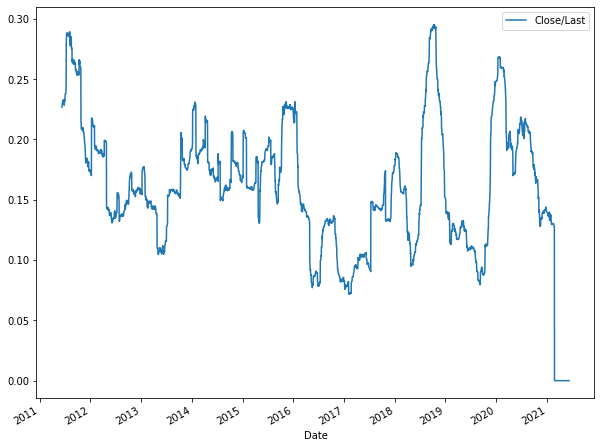

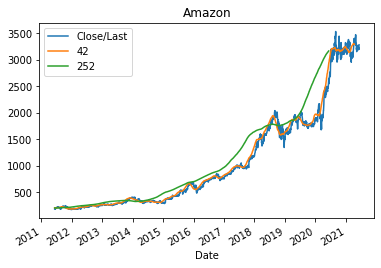

In [5]:
# Calculating the Volatility
# Calculating variance of these daily percentage values
vol=daily_pct_change_s1.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)
print(vol.tail())


# Plotting the Volatility
vol.plot(figsize=(10,8))
#plt.show()
plt.savefig("VolatilityGraph.png")
# Rolling means(Trend and Seasonality)
s1_close_px=s1_2["Close/Last"]

# Short term moving window rolling mean
s1_2["42"]=s1_close_px.rolling(window=40).mean()
# Long term moving window rolling mean
s1_2["252"]=s1_close_px.rolling(window=252).mean()
# plot the  closing price,the short and long terms windows of rolling means
print(s1_2.head())
s1_2[["Close/Last","42","252"]].plot(title="Amazon")
#plt.show()
plt.savefig("TrendAndSeasonality.png")